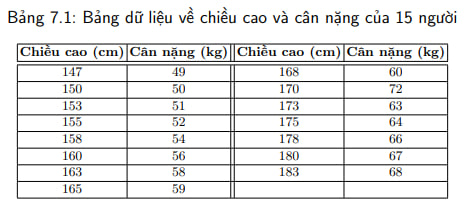

## **Linear Regression (Formula)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#height (cm), input data, independence variables
X = np.array([[147, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
#weight (kg), output data in training set, dependece variables
Y = np.array([49, 50, 51, 52, 54, 56, 58, 59, 60, 72, 63, 64, 66, 67, 68])


In [ ]:
#Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) #each point is one row
#Calculating weigth of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)
#weight
w_0, w_1 = w[0], w[1]

Input 155cm, true output 52kg, predicted output 53.24kg
Input 160cm, true output 56kg, predicted output 56.20kg


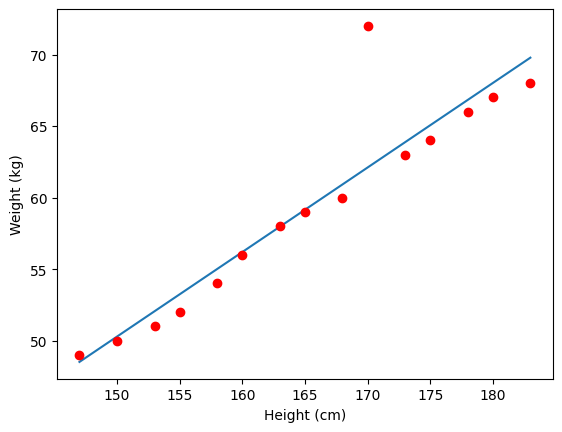

In [ ]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
_w = np.array([w_0, w_1])
y = np.dot(Xbar, _w)
plt.plot(X, y)
print('Input 155cm, true output 52kg, predicted output %.2fkg' %(y1) )
print('Input 160cm, true output 56kg, predicted output %.2fkg' %(y2) )
plt.plot(X, Y, 'ro')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## **Linear Regression (scikit-learn)**

In [ ]:
from sklearn import datasets, linear_model
#fit the model by Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)
#Compare 2 results from scikit-learn lib and formula
print("Scikit-learn: w_1 = ", regr.coef_[0], ", w_0 = ", regr.intercept_)
print("Formula: w_1 = ", w[1], ", w_0 = ", w[0])


Scikit-learn: w_1 =  0.5906851768920733 , w_0 =  -38.314524555903844
Formula: w_1 =  0.5906851768903693 , w_0 =  -38.3145245556209


## **K-neighbor**

**Distance one point to each point in set data**

In [ ]:
# from __future__ import print_fuction
import numpy as np
from time import time
d, N = 1000, 10000   #dimensional, number of training point
X = np.random.randn(N, d)   # N d-dimensional point
z = np.random.randn(d)

In [ ]:
#compute square distance between two point
def dist_pp(z, x):
    d = z - x.reshape(z.shape)  # force x and z to have the same dims
    return sum(d*d)


#compute distance one point to each point in a set
def dist_ps_naive(z, X):
    N = X.shape[0]
    res = np.zeros((1, N))
    for i in range(N):
        res[0][i] = dist_pp(z, X[i])
    return res

#compute distance one point to each point in a set faster
def dist_ps_fast(z, X):
    X2 = np.sum(X*X, 1)
    z2 = np.sum(z*z)
    return X2 + z2 - 2*X.dot(z)


#Compare time between naive func and fast func
t1 = time()
D1 = dist_ps_naive(z, X)
print("time of function naive:", time() - t1 )


t2 = time()
D2 = dist_ps_fast(z, X)
print("time of function fast:", time() - t2 )

time of function naive: 0.9448754787445068
time of function fast: 0.028533935546875


**Example for using sklearn to split data set and fit model**


In [ ]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [ ]:
print('labels:', np.unique(iris_y))

#split train and test
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 130)
print('Training size:', X_train.shape[0], 'Test size:', X_test.shape[0])

labels: [0 1 2]
Training size: 20 Test size: 130


**Weight = distance / uniform**

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors=1, p = 2, \
weights='distance')   # weights = uniform / distance; Can change n_neighbors: number of another point to compare distance, p: l1/l2 norm, l1=p=1, l2=p=2
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy of 1NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

accuracy of 1NN (1/distance weights): 92.31 %


**Customized weight**

In [ ]:
def myweight(distance):
    sigma2 = .4   #can change this number
    return np.exp(-distance**2/sigma2)

model = neighbors.KNeighborsClassifier(n_neighbors=7, p = 2, weights=myweight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy of 1NN (customize weights): %.2f% %" %(100*accuracy_score(y_test, y_pred)))

accuracy of 1NN (customize weights): 95.38 %


## **K-means clustering**

**Follow Formula**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 #number of clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

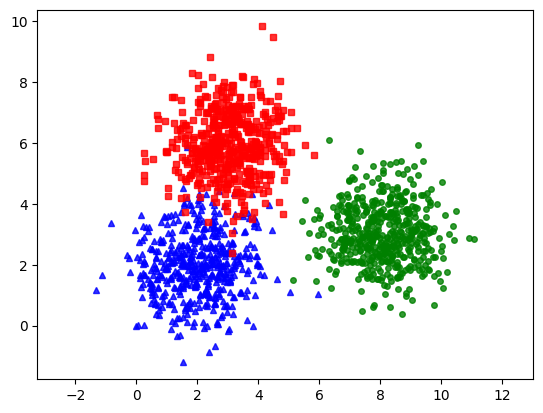

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [ ]:
from types import new_class
def kmeans_init_centroids(X, k):
    #random pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centroids):
    #calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    #return index of the closet centroid
    return np.argmin(D, axis = 1)

def has_converged(centroids, new_centroids):
    #return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) ==
            set([tuple(a) for a in new_centroids]))

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        #collect all points that are assigned to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k, :] = np.mean(Xk, axis = 0)  #then take average
    return centroids

def kmeans(X, k):
    centroids = [kmeans_init_centroids(X, k)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
          break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

Centers found by our algorithm:
[[1.9834967  1.96588127]
 [8.07476866 3.01494931]
 [3.02702878 5.95686115]]


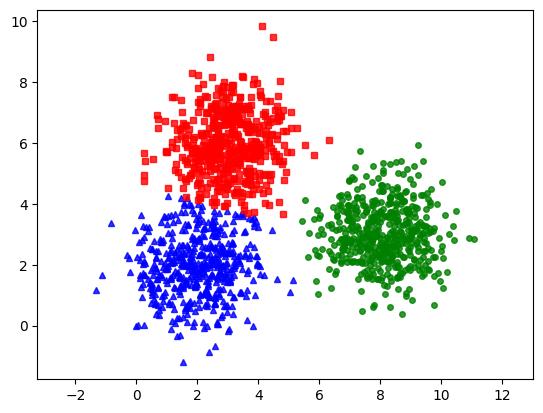

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

**Scikit-learn library**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [3.02429957 5.95334038]
 [1.98417154 1.96141961]]


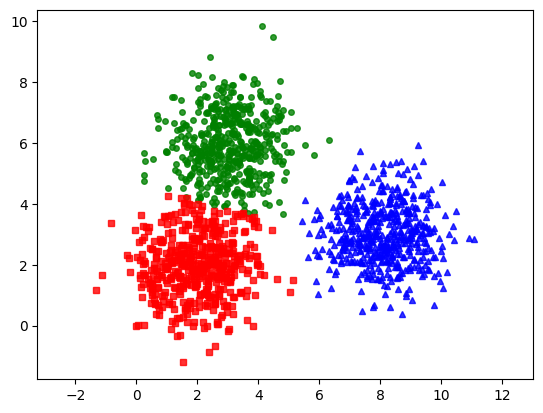

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## **Naive Bayes classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

#train data
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]
train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])

#test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

#call MultinomialNB
model = MultinomialNB()

#training
model.fit(train_data, label)

#test
print('Predicting class of d5:', str(model.predict(d5)[0]))
print('Probability of d6 in each class:', str(model.predict_proba(d6)))

Predicting class of d5: B
Probability of d6 in each class: [[0.29175335 0.70824665]]


## **Perceptron learning algorithm**

In [ ]:
import numpy as np
def predict(w, X):
  return np.sign(X.dot(w))

def perceptron(X, y, w_init):
  w = w_init
  while True:
    pred = predict(w, X)
    #find indexes of misclassified points
    mis_idxs = np.where(np.equal(pred, y) == False)[0]
    #number of misclassified points
    num_mis = mis_idxs.shape[0]
    if num_mis == 0:
      return w
    #random pick one misclassified point
    random_id = np.random.choice(mis_idxs, 1)[0]
    #update w
    w = w + y[random_id]*X[random_id]

In [ ]:
means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))

Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)

## **Logistic Regression**

In [ ]:
def sigmoid(S):
  return 1/(1 + np.exp(-S))

def prob(w, X):
  return sigmoid(X.dot(w))

def loss(w, X, y, lam):
  z = prob(w, X)
  return -np.mean(y*np.log(z) + (1-y)*np.log(1-z) + 0.5*lam/X.shape[0]*np.sum(w*w))

In [ ]:
def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
  #lam - reg paramether, lr - learning rate, nepoches - number of epoches
  N, d = X.shape[0], X.shape[1]
  w = w_old = w_init
  loss_hist = [loss(w_init, X, y, lam)]  #store history of loss in loss-hist
  ep = 0
  while ep < nepoches:
    ep += 1
    mix_ids = np.random.permutation(N)
    for i in mix_ids:
      xi = X[i]
      yi = y[i]
      zi = sigmoid(xi.dot(w))
      w = w - lr*((zi - yi)*xi + lam*w)
    loss_hist.append(loss(w, X, y, lam))
    if np.linalg.norm(w - w_old)/d < 1e-6:
      break
    w_old = w
  return w, loss_hist

In [ ]:
# X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#bias trick
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr = 0.05, nepoches = 500)
print(w)
print(loss(w, Xbar, y, lam))

ValueError: operands could not be broadcast together with shapes (20,) (2500,) 

**distinguish 2 number handwriting**

In [ ]:
!apt install sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package sklearn


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
mnist = fetch_openml('MNIST original', data_home='../../data/') #transmit link data
N, d = mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


InvalidURL: URL can't contain control characters. '/api/v1/json/data/list/data_name/mnist original/limit/2/status/active/' (found at least ' ')

In [ ]:
X_all = mnist.data
y_all = mnist.target

X0 = X_all[np.where(y_all == 0)[0]] #all digit 0
X1 = X_all[np.where(y_all == 1)[0]] #all digit 1
y0 = np.zeros(X0.shape[0]) #class 0 label
y1 = np.zeros(X1.shape[0]) #class 1 label

X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((y0, y1)) #all labels

#split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000)

NameError: name 'mnist' is not defined

In [ ]:
model = LogisticRegression(C = 1e5) #C is inverse of lam
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f% %" % (100*accuracy_score(y_test, y_pred.tolist())))

NameError: name 'X_train' is not defined

In [ ]:
mis = np.where((y_pred - y_test) != 0)
Xmis = X_test[mis, :]

from display_network import *
filename = 'mnist_mis.pdf'
with PdfPages(filename) as pdf:
  plt.axis('off')
  A = display_network(Xmis.T, 1, Xmis.shape[0])
  f2 = plt.imshow(A, interpolation='nearest')
  plt.gray()
  pdf.savefig(bbox_inches='tight')
  plt.show()

NameError: name 'y_pred' is not defined

## **Softmax Regression**

In [ ]:
import numpy as np
def sigmoid(S):
  return 1/(1 + np.exp(-S))

def prob(w, X):
  return sigmoid(X.dot(w))

def loss(w, X, y, lam = 0.001):
  z = prob(w, X)
  return -np.mean(y*np.log(z) + (1-y)*np.log(1-z) + 0.5*lam/X.shape[0]*np.sum(w*w))

def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
  A = e_Z / e_Z.sum(axis = 1, keepdims = True)
  return A

def softmax_loss(X, y, W):
  A = softmax_stable(X.dot(W))
  id0 = range(X.shape[0])
  return -np.mean(np.log(A[id0, y]))

def softmax_grab(X, y, W):
  A = softmax_stable(X.dot(W)) #shape of (N, C)
  id0 = range(X.shape[0])
  A[id0, y] -= 1 # A - Y, shape of (N, C)
  return X.T.dot(A)/X.shape[0]

def softmax_fit(X, y, W, lr = 0.01, nepoches = 100, tol = 1e-5, batch_size = 10):
  W_old = W.copy()
  ep = 0
  loss_hist = [loss(X, y, W)] #store history of loss
  N = X.shape[0]
  nbatches = int(np.ceil(float(N)/batch_size))
  while ep < nepoches:
    ep += 1
    mix_ids = np.random.permutation(N) #mix_data
    for i in range(nbatches):
      #get the i-th batch
      batch_ids = mix_ids[batch_size*i:min(batch_size*(i+1), N)]
      X_batch, y_batch = X[batch_ids], y[batch_ids]
      W -= lr*softmax_grab(X_batch, y_batch, W) #update gradient descent
    loss_hist.append(softmax_loss(X, y, W))
    if np.linalg.norm(W - W_old)/W.size < tol:
      break
    w_old = w.copy()
    return W, loss_hist

def pred(W, X):
  return np.argmax(X.dot(W), axis = 1)

In [ ]:
C, N = 5, 500 #number of classes and number of points per class
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)
X = np. concatenate((X0, X1, X2, X3, X4), axis = 0) #bias trick
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)

y = np.asarray([0]*N + [1]*N + [2]*N + [3]*N + [4]*N)
W_init = np.random.randn(Xbar.shape[1], C)
W, loss_hist = softmax_fit(Xbar, y, W_init, batch_size = 10, nepoches = 100, lr = 0.05)

ValueError: operands could not be broadcast together with shapes (3,5) (3,) 

## **Multilayer neural network and backpropagation**

In [ ]:
import numpy as np
def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
  A = e_Z / e_Z.sum(axis = 1, keepdims = True)
  return A

def crossentropy_loss(Yhat, y):
  id0 = range(Yhat.shape[0])
  return -np.mean(np.log(Yhat[id0, y]))

def mlp_init(d0, d1, d2):
  W1 = 0.01 * np.random.randn(d0, d1)
  b1 = np.zeros(d1)
  W2 = 0.01 * np.random.randn(d1, d2)
  b2 = np.zeros(d2)
  return (W1, b1, W2, b2)

def mlp_predict(X, W1, b1, W2, b2):
  Z1 = X.dot(W1) + b1
  A1 = np.maximum(Z1, 0)
  Z1 = A1.dot(W2) + b2
  return np.argmax(Z1, aixs = 1)

def mlp_fit(X, y, W1, b1, W2, b2, eta):
  loss_hist = []
  for i in xrange(20000):
    #feedforward
    Z1 = X.dot(W1) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = A1.dot(W2) + b2
    Yhat = softmax_stable(Z2)
    if i%1000 == 0:
      loss = crossentropy_loss(Yhat, y)
      print("iter %d, loss: %f" %(i, loss))
      loss_hist.append(loss)

    #backpropagation
    id0 = range(Yhat.shape[0])
    Yhat[id0, y] -= 1
    E2 = Yhat/N
    dW2 = np.dot(A1.T, E2)
    db2 = np.sum(E2, axis = 0)
    E1 = np.dot(X.T, E1)
    E1[Z1 <= 0] = 0
    dW1 = np.dot(X.T, E1)
    db1 = np.sum(E1, axis = 0)

    #Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2
  return (W1, b1, W2, b2, loss_hist)

In [ ]:
#ADD INPUT DATA AND LABEL
#suppose X, y are training input nd output, respectively
d0 = 2
d1 = h = 100
d2 = C = 3
eta = 1
(W1, b1, W2, b2) = mlp_init(d0, d1, d2)
(W1, b1, W2, b2, loss_hist) = mlp_fit(X, y, W1, b1, W2, b2, eta)
y_pred = mlp_predict(X, W1, b1, W2, b2)
acc = 100 * np.mean(y_pred == y)
print("training accuracy: %.2f%%" %acc)

NameError: name 'X' is not defined

**Using scikit-learn lib**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[0], cov1, N)
X2 = np.random.multivariate_normal(means[0], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
y = np.asarray([0]*N + [1]*N + [2]*N)

alpha = 1e-1
clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(100))
clf.fit(X, y)
y_pred = clf.predict(X)
acc = 100*np.mean(y_pred == y)
print("training accuracy: %.2f%%" %acc)

training accuracy: 80.00%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
